In [84]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movielens/users.dat
/kaggle/input/movielens/ratings.dat
/kaggle/input/movielens/movies.dat


# **importing the libraries**

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

import warnings
warnings.filterwarnings('ignore')

# **loading the dataset**

In [86]:
movies = pd.read_csv(r"/kaggle/input/movielens/movies.dat", sep='::', engine='python', encoding='latin1')
movies.columns =['MovieID', 'Title', 'Genres']
movies.dropna(inplace=True)
movies.head()

,MovieID,Title,Genres
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


# **DATA PREPROCESSING**

In [87]:
#Input ratings dataset
ratings = pd.read_csv(r"/kaggle/input/movielens/ratings.dat",sep='::', engine='python')
ratings.columns =['UserID', 'MovieID', 'Rating', 'Timestamp']
ratings.dropna(inplace=True)

#Read the sample ratings dataset
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [12]:
#Input users dataset
users = pd.read_csv(r"/kaggle/input/movielens/users.dat",sep='::',engine='python')
users.columns =['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']
users.dropna(inplace=True)

#Read the sample users dataset
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [13]:
#Merge the ratings and users with movieID and UserID
ratings_user = pd.merge(ratings,users, on=['UserID'])
ratings_movie = pd.merge(ratings,movies, on=['MovieID'])

master_data = pd.merge(ratings_user,ratings_movie,on=['UserID', 'MovieID', 'Rating'])[['MovieID', 'Title', 'UserID', 'Age', 'Gender', 'Occupation', 'Rating']]

master_data.head()

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
0,1357,Shine (1996),2,56,M,16,5
1,3068,"Verdict, The (1982)",2,56,M,16,4
2,1537,Shall We Dance? (Shall We Dansu?) (1996),2,56,M,16,4
3,647,Courage Under Fire (1996),2,56,M,16,3
4,2194,"Untouchables, The (1987)",2,56,M,16,4


In [67]:
# Number of movies with Rating of 5 = 225473
master_data[master_data['Rating'] == 5]

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
0,1357,Shine (1996),2,56,2,16,5
6,2268,"Few Good Men, A (1992)",2,56,2,16,5
10,3468,"Hustler, The (1961)",2,56,2,16,5
15,3578,Gladiator (2000),2,56,2,16,5
26,1610,"Hunt for Red October, The (1990)",2,56,2,16,5
...,...,...,...,...,...,...,...
998065,1077,Sleeper (1973),6040,25,2,6,5
998070,2022,"Last Temptation of Christ, The (1988)",6040,25,2,6,5
998071,2028,Saving Private Ryan (1998),6040,25,2,6,5
998076,1094,"Crying Game, The (1992)",6040,25,2,6,5


In [14]:
# Number of movies with Rating of 5 and Age less than 35 = 132569
master_data[(master_data['Rating'] == 5) & (master_data['Age'] < 35 ) ]

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
139,1079,"Fish Called Wanda, A (1988)",3,25,M,15,5
141,1615,"Edge, The (1997)",3,25,M,15,5
143,1259,Stand by Me (1986),3,25,M,15,5
145,2167,Blade (1998),3,25,M,15,5
148,260,Star Wars: Episode IV - A New Hope (1977),3,25,M,15,5
...,...,...,...,...,...,...,...
998065,1077,Sleeper (1973),6040,25,M,6,5
998070,2022,"Last Temptation of Christ, The (1988)",6040,25,M,6,5
998071,2028,Saving Private Ryan (1998),6040,25,M,6,5
998076,1094,"Crying Game, The (1992)",6040,25,M,6,5


In [15]:
master_data.isnull().sum()

MovieID       0
Title         0
UserID        0
Age           0
Gender        0
Occupation    0
Rating        0
dtype: int64

# Exploartory Data Analysis

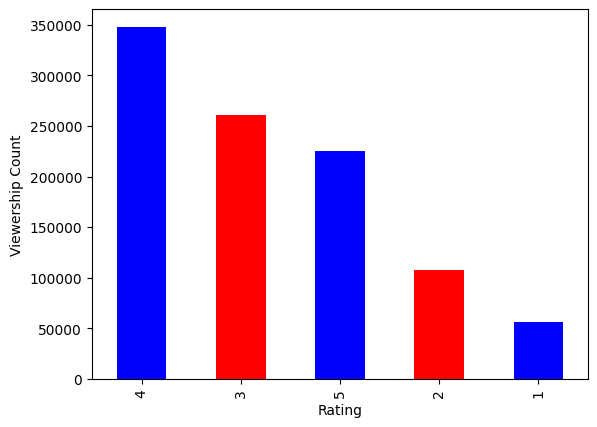

In [88]:
a = master_data.groupby("Rating").size().sort_values(ascending=False)[:35]
plt.xlabel("Rating")
plt.ylabel("Viewership Count")
a.plot(kind="bar",color = ['blue','RED'])
plt.show()


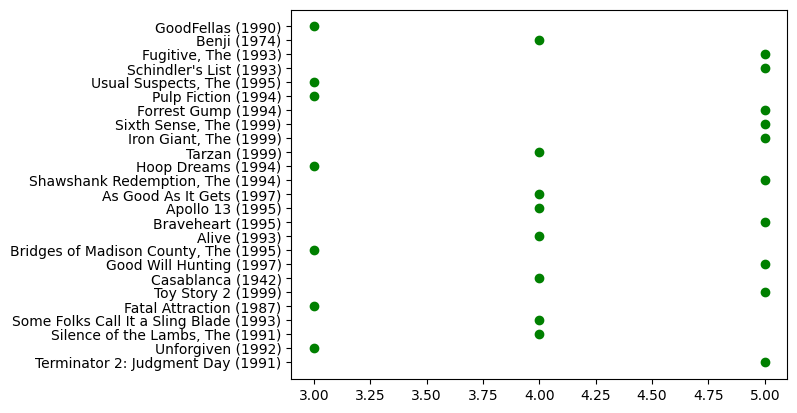

In [69]:
# Ratings for all the movies reviewed by a particular user whose user ID is 55

a = master_data[master_data.UserID == 55]

plt.scatter(y=a.Title, x=a.Rating , color = 'GREEN')
plt.show()

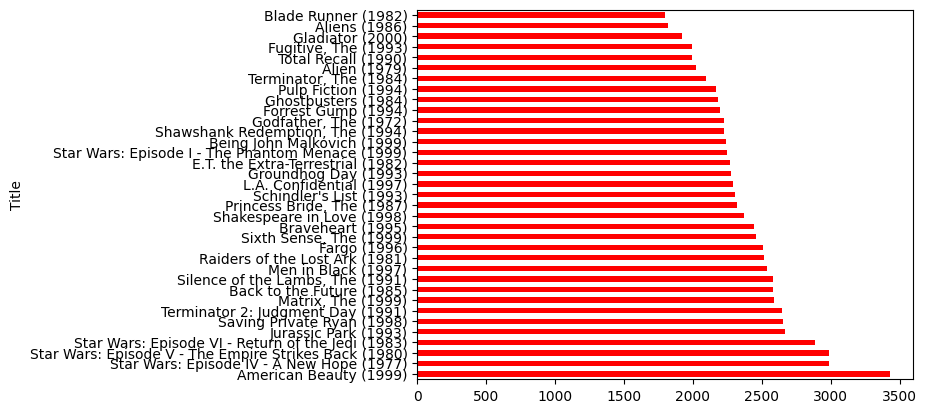

In [90]:
a = master_data.groupby("Title").size().sort_values(ascending=False)[:35]
plt.ylabel("Title")
plt.xlabel("Viewership Count")
a.plot(kind="barh", color = ['red'])
plt.show()

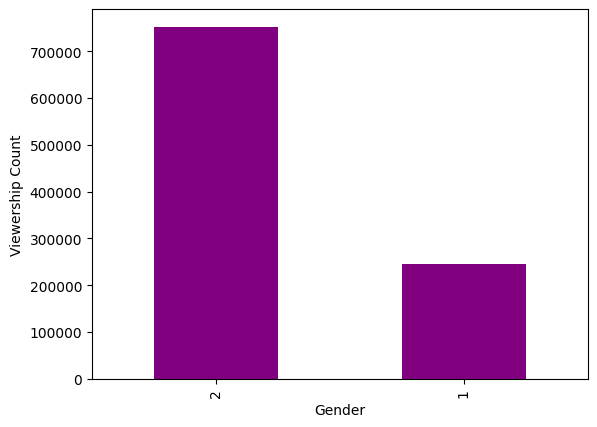

In [70]:
a = master_data.groupby("Gender").size().sort_values(ascending=False)[:35]
plt.xlabel("Gender")
plt.ylabel("Viewership Count")
a.plot(kind="bar",color = ['purple'])
plt.show()

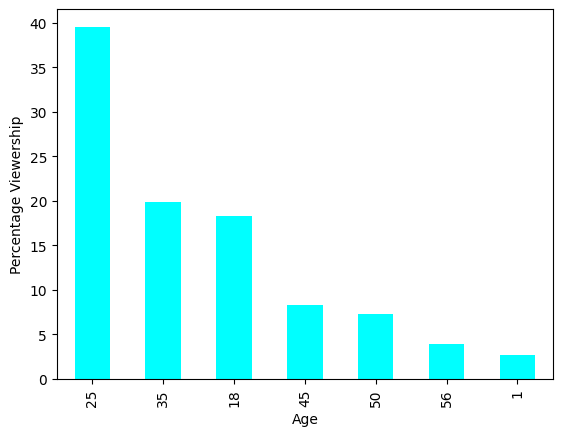

In [71]:
a = master_data.groupby("Age").size().sort_values(ascending=False)[:35]
plt.xlabel("Age")
plt.ylabel("Percentage Viewership")
total_viewership = len(master_data)
a_per = (a / total_viewership) * 100
a_per.plot(kind="bar",color = ['cyan'])
plt.show()

In [80]:
gender = {'F':1, 'M':2}
master_data['Gender'] = master_data['Gender'].replace(gender)
features = master_data[['MovieID', 'Age', 'Occupation', 'Gender','UserID']].values

labels = master_data[['Rating']].values
train, test, train_labels, test_labels = train_test_split(features,labels,test_size=0.33,random_state=42)

# **MODEL 1**

In [81]:
#Logistic regression model
model = LogisticRegression()
model.fit(train, train_labels)
Y_pred = model.predict(test)
accuracy_logreg= model.score(train, train_labels)
accuracy_logreg

0.34808355752019177

# **MODEL 2**

In [82]:
# K-nearest neighbours Model(KNN)
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(train, train_labels)
Y_pred = model.predict(test)
accuracy_KNN= model.score(train, train_labels)
accuracy_KNN

0.6062002682765252

# **MODEL 3**

In [83]:
# Decision Tree Model
model = DecisionTreeClassifier()
model.fit(train, train_labels)
Y_pred = model.predict(test)
accuracy_decisionTree= model.score(train, train_labels)
accuracy_decisionTree

1.0

# **PROJECT REPORT** MODEL COMPARSION VISULAISATION

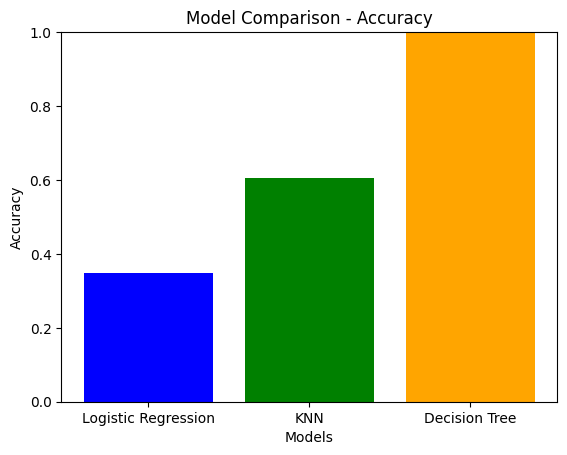

In [66]:
# Model Comparison - Visualization (COMPARISON OF 3 MODELS)
models = ['Logistic Regression', 'KNN', 'Decision Tree']
accuracies = [accuracy_logreg,accuracy_KNN,accuracy_decisionTree]

plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Comparison - Accuracy")
plt.ylim([0, 1])
plt.show()